this dataset :

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features....

# load Libraries

In [ ]:
import sklearn
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from subprocess import check_output
#from sklearn.preprocessing  import Imputer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# load dataset :

In [ ]:
df=pd.read_csv('loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

loan_id - 4269
 no_of_dependents - 6
 education - 2
 self_employed - 2
 income_annum - 98
 loan_amount - 378
 loan_term - 10
 cibil_score - 601
 residential_assets_value - 278
 commercial_assets_value - 188
 luxury_assets_value - 379
 bank_asset_value - 146
 loan_status - 2


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- loan_id ---
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: loan_id, Length: 4269, dtype: int64
----  no_of_dependents ---
4    752
3    727
0    712
2    708
1    697
5    673
Name:  no_of_dependents, dtype: int64
----  education ---
 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64
----  self_employed ---
 Yes    2150
 No     2119
Name:  self_employed, dtype: int64
----  income_annum ---
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name:  income_annum, Length: 98, dtype: int64
----  loan_amount ---
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name:  loan_amount, Length: 378, dtype: int64
----  loan_term ---
6     490
12    456
4     447
10    436
18    422
16    

# ** preprocessing data :

# 1- covert string value:
-we have three string column to convert :  loan_status - education -self_employed

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
rank=[' Rejected',' Approved']
oe = OrdinalEncoder(categories=[rank])
df[' loan_status'] = oe.fit_transform(df[[' loan_status']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [ ]:
rank=[' Not Graduate',' Graduate']
oe = OrdinalEncoder(categories=[rank])
df[' education'] = oe.fit_transform(df[[' education']])
df[' education']

0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
4264    1.0
4265    0.0
4266    0.0
4267    0.0
4268    1.0
Name:  education, Length: 4269, dtype: float64

In [ ]:
oe = OrdinalEncoder()
df[' self_employed'] = oe.fit_transform(df[[' self_employed']])

In [ ]:
df[' self_employed']

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
4264    1.0
4265    1.0
4266    0.0
4267    0.0
4268    0.0
Name:  self_employed, Length: 4269, dtype: float64

# **drow the data **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

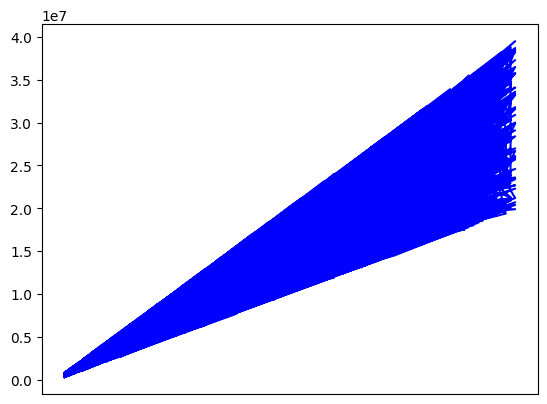

In [ ]:
## date + death
plt.plot(df[' income_annum'], df[' loan_amount'], color='blue')
# plt.title('dd')
# plt.ylabel('Number of death')
# plt.xlabel('data')
plt.xticks([])
plt.show()

<BarContainer object of 4269 artists>

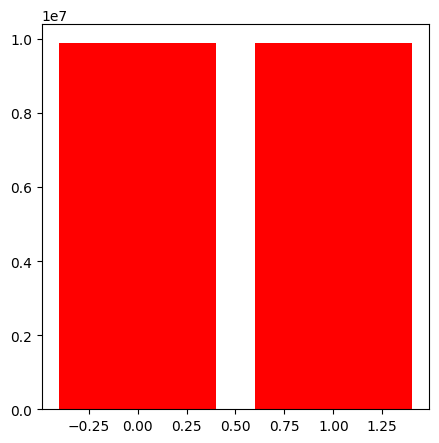

In [ ]:
## state + recovered
plt.figure(figsize=(5,5))
plt.bar(df[' education'], df[' income_annum'], color='red')
# plt.title(' COVID-19 ')
# plt.xlabel('date')
# plt.ylabel('case ')

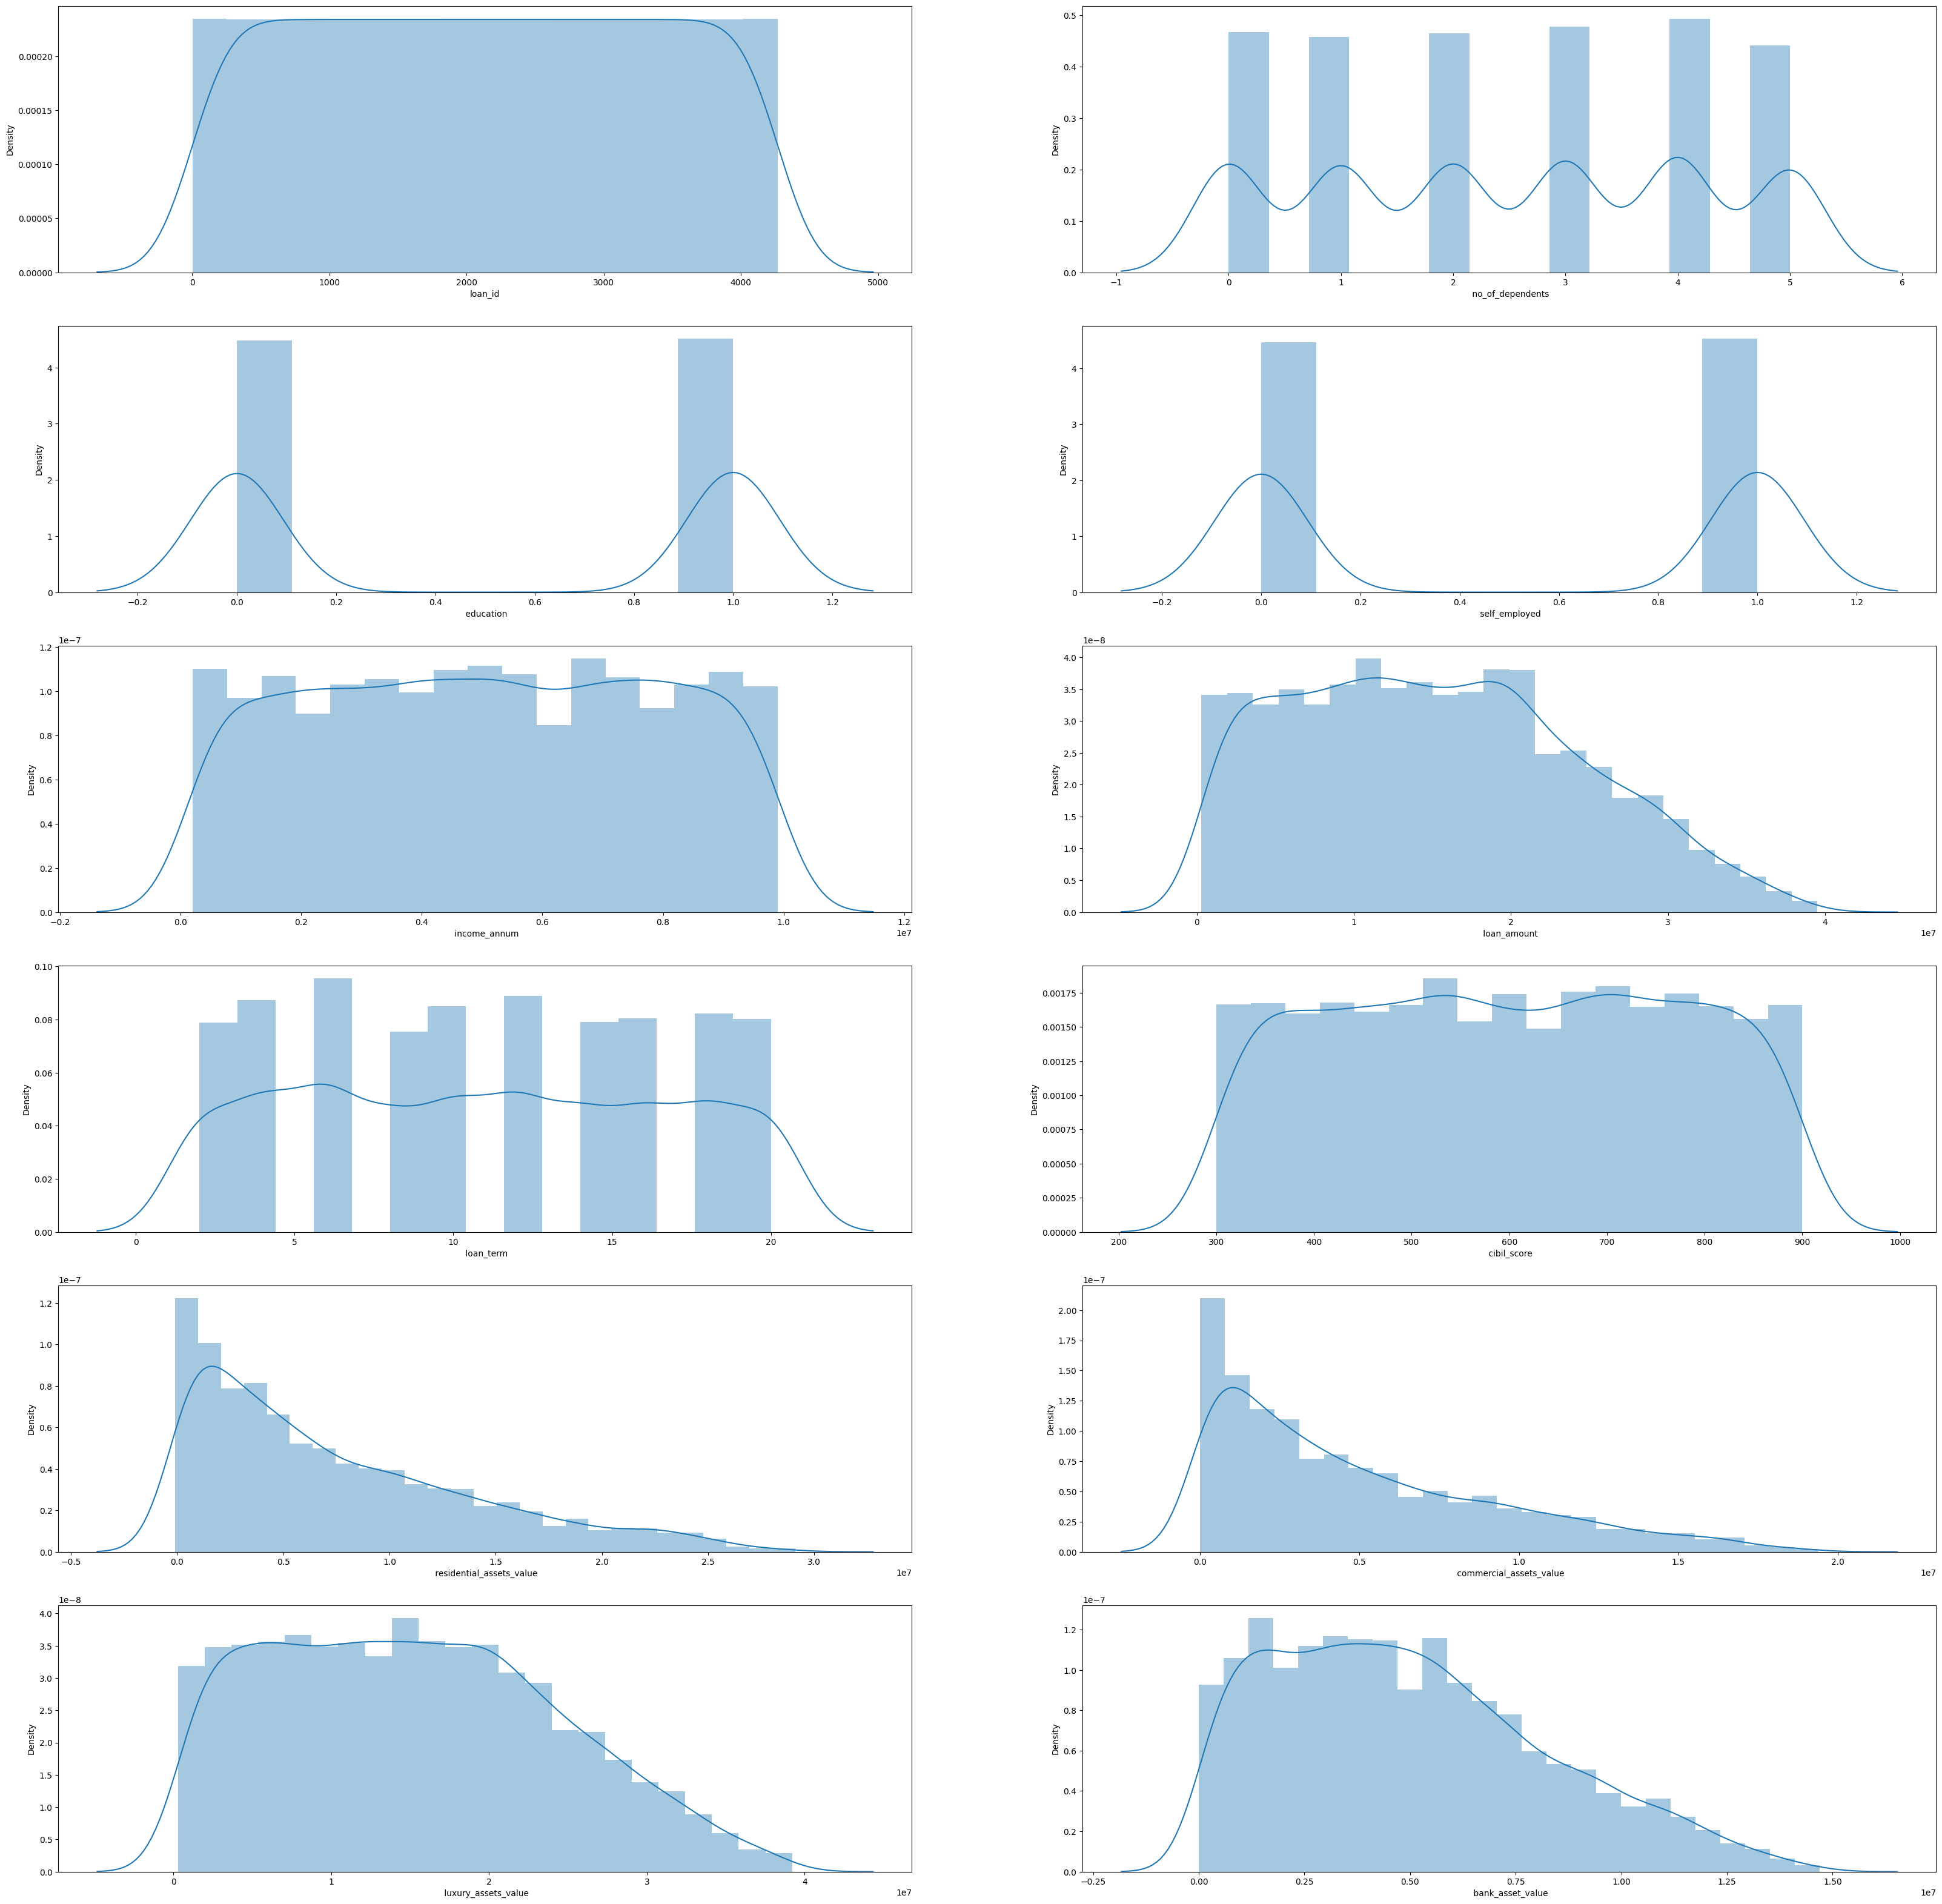

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.distplot(df[col], ax = ax)

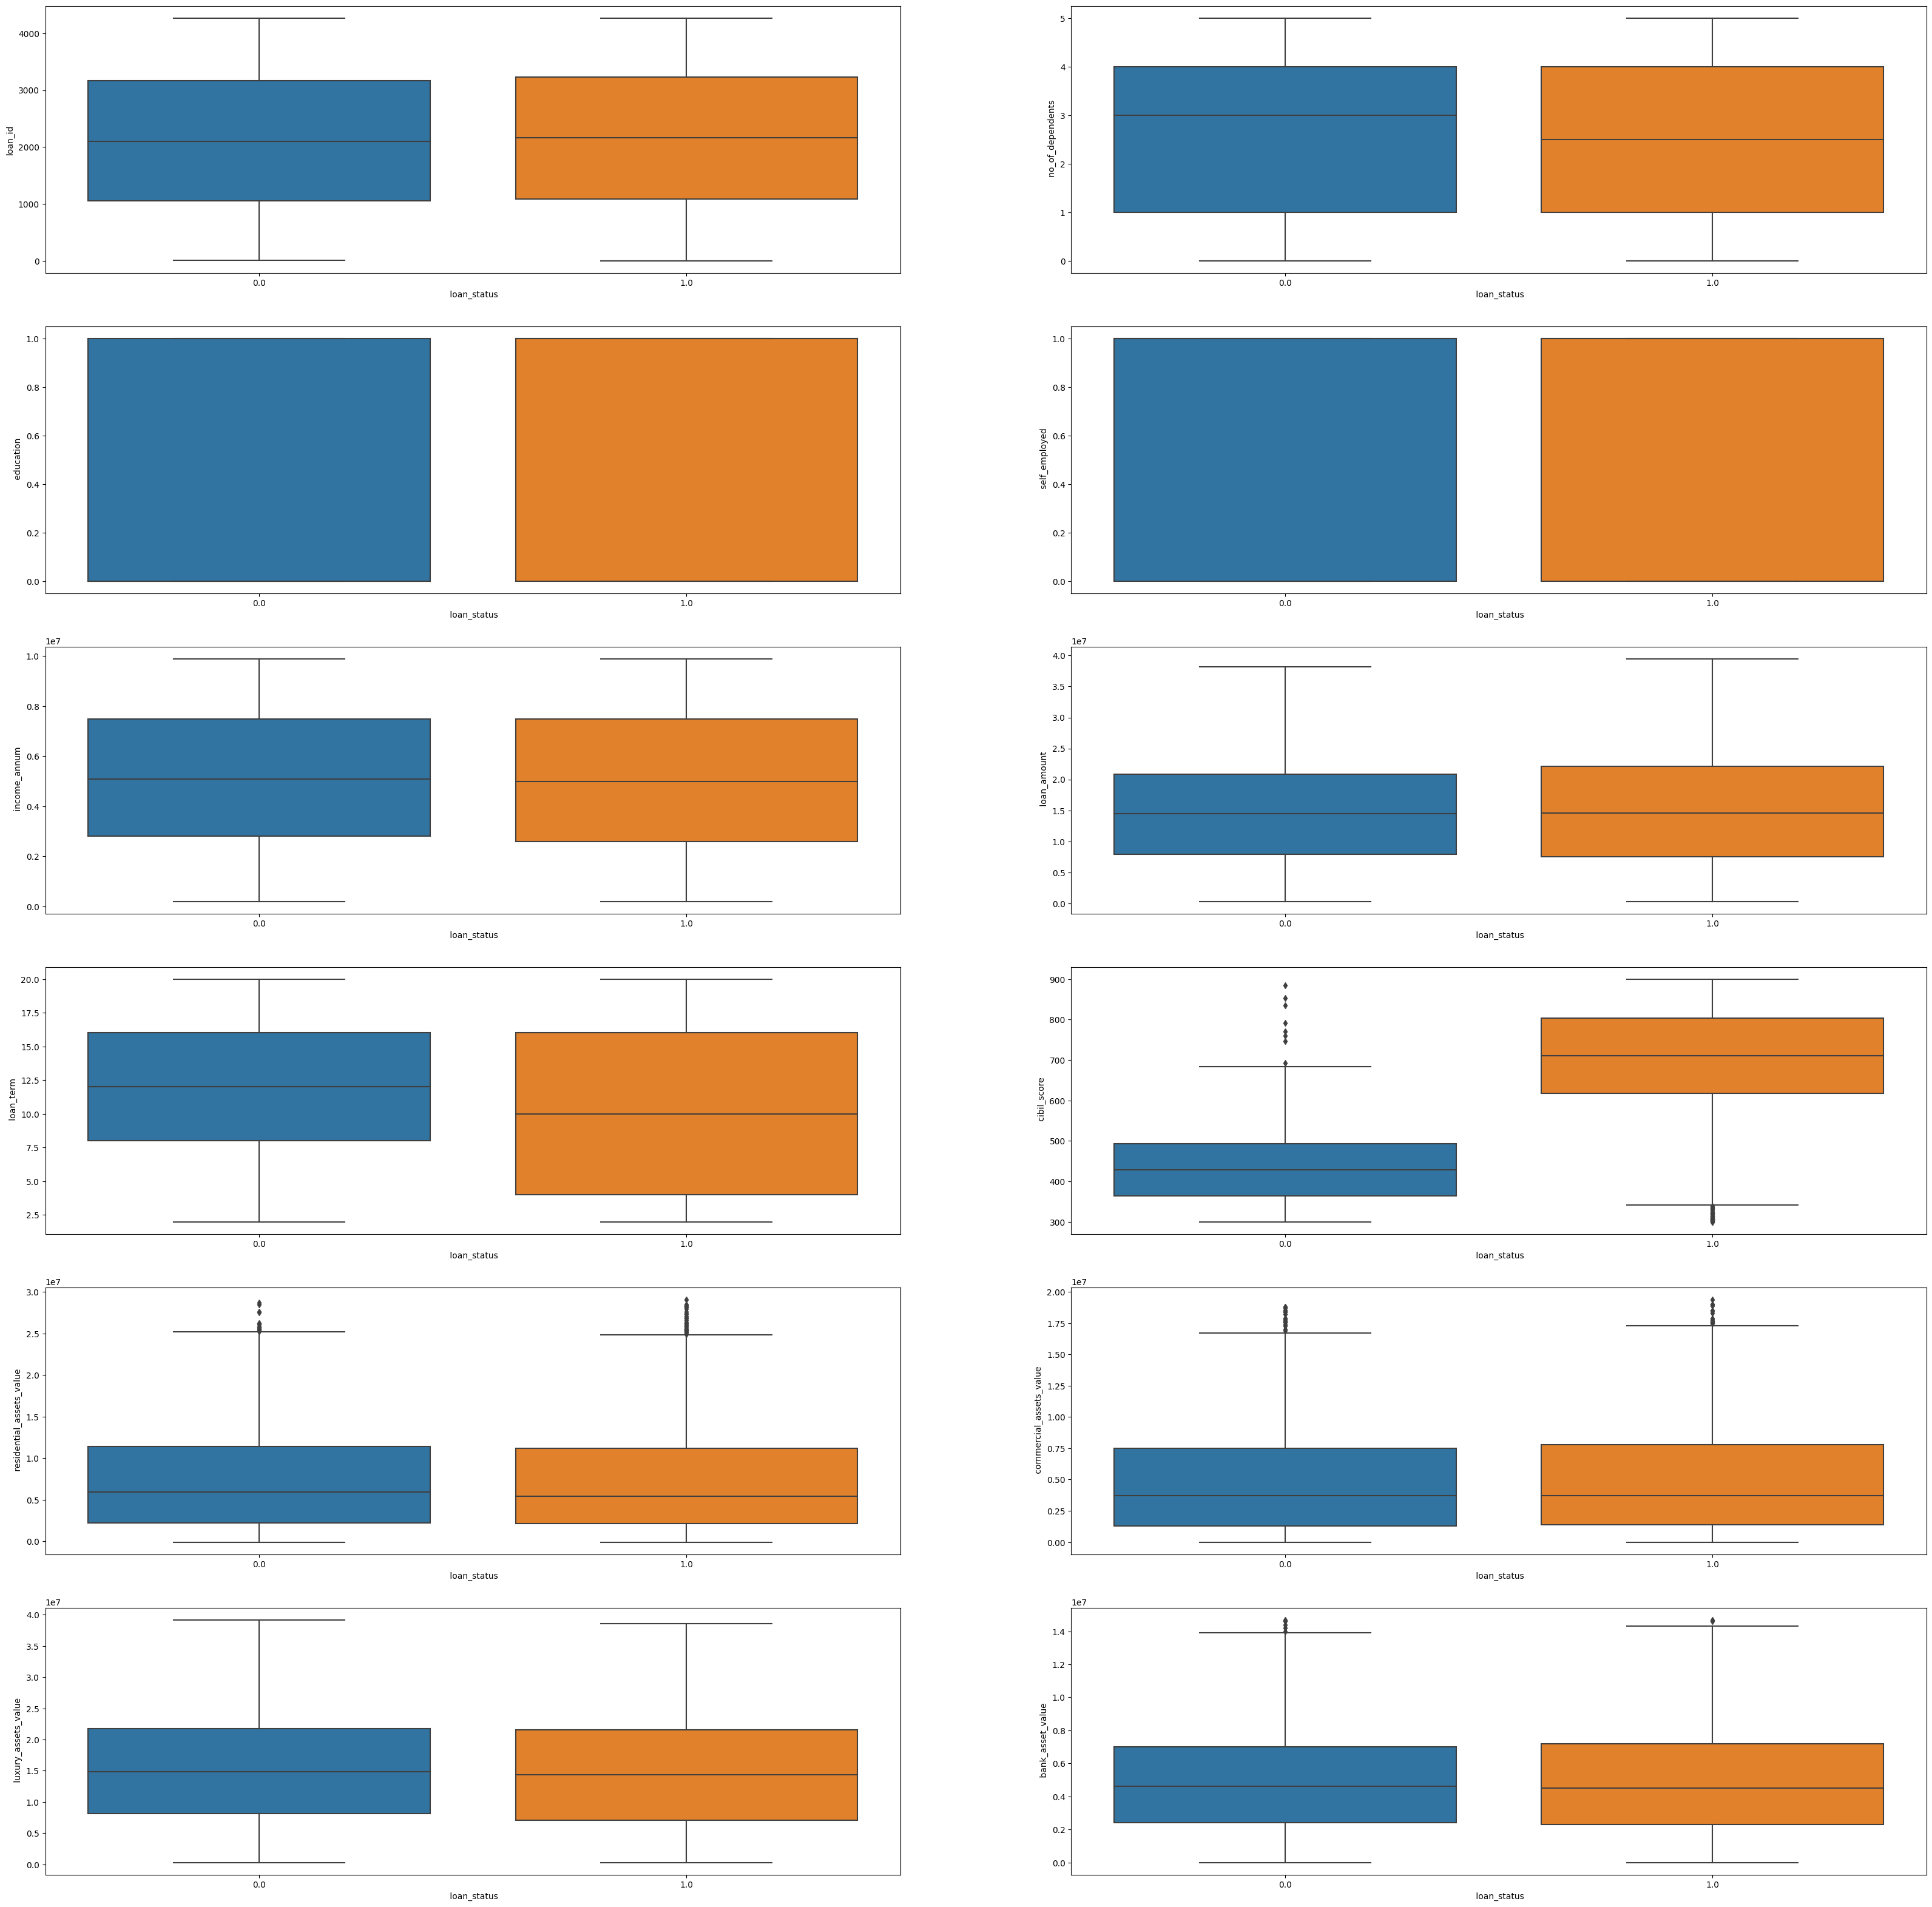

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [ ]:
df.drop(['loan_id'],axis=1,inplace=True)

<Axes: >

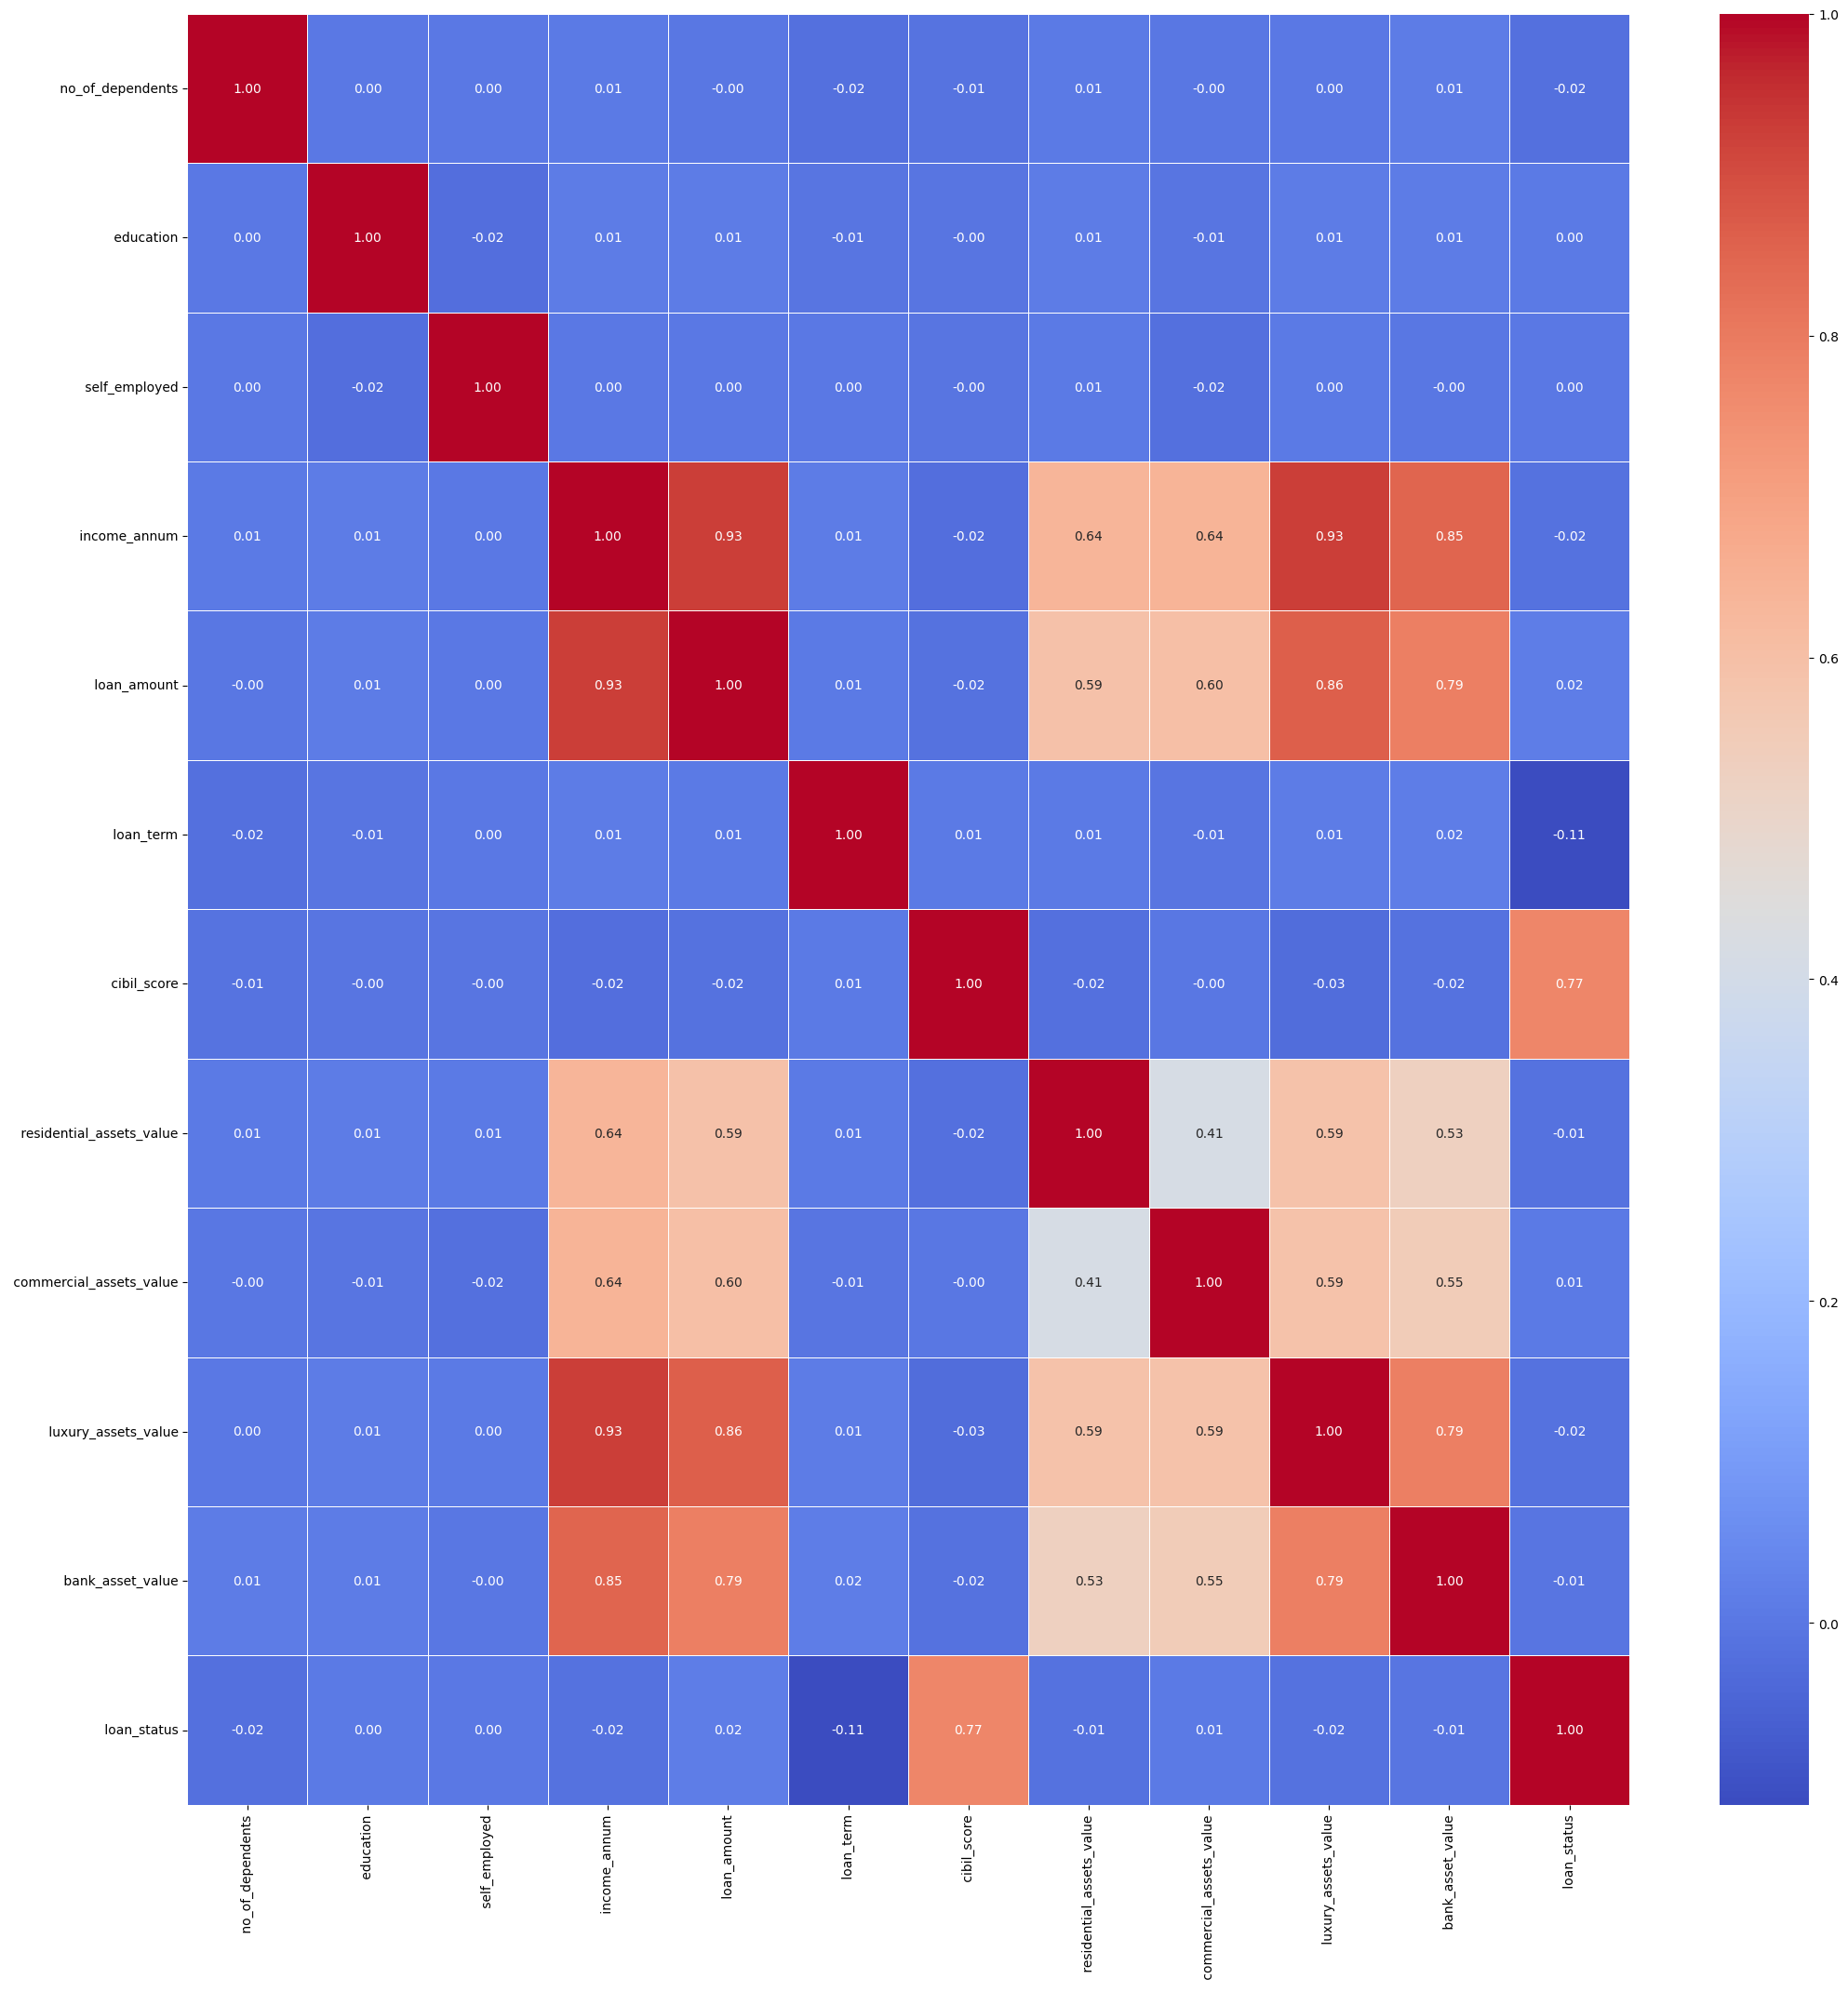

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

**WILL DROP CORR 0.00 AND ALSO ONE OF THE FEATURES MORE THAN .85 CORR**

In [ ]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.drop([' income_annum',' loan_amount'],axis=1,inplace=True)

<Axes: >

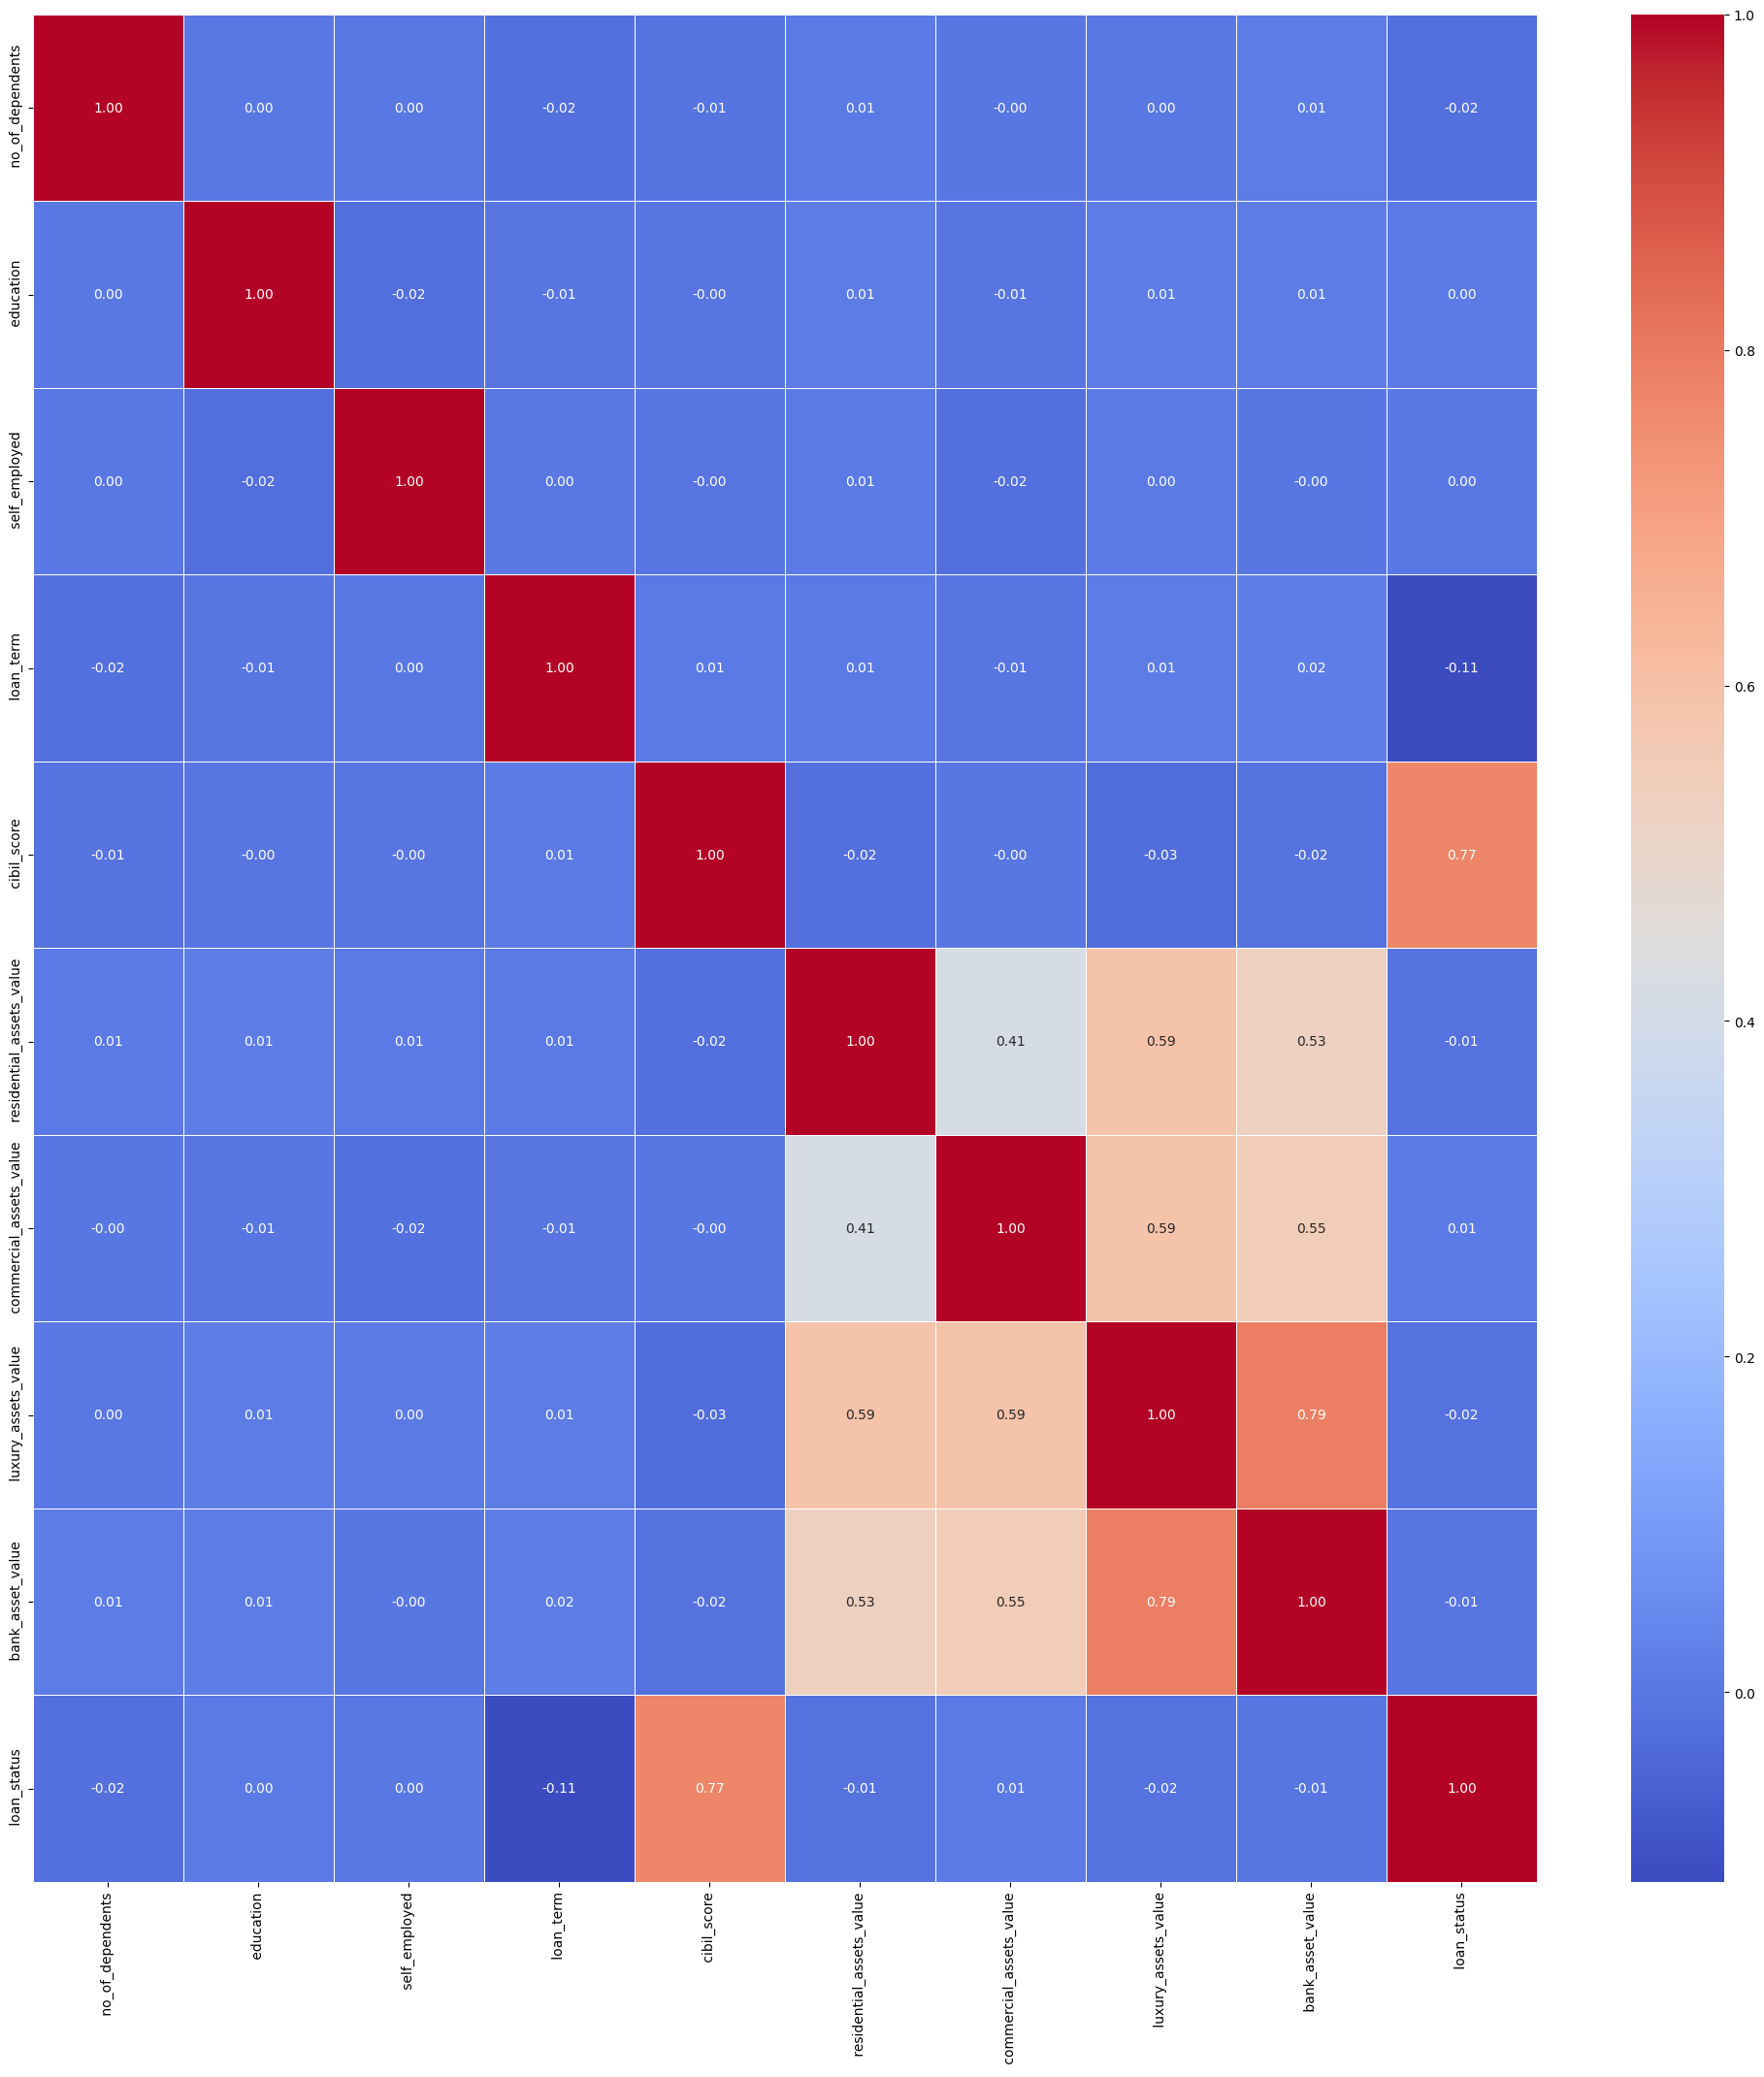

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

<Axes: xlabel=' cibil_score', ylabel=' loan_term'>

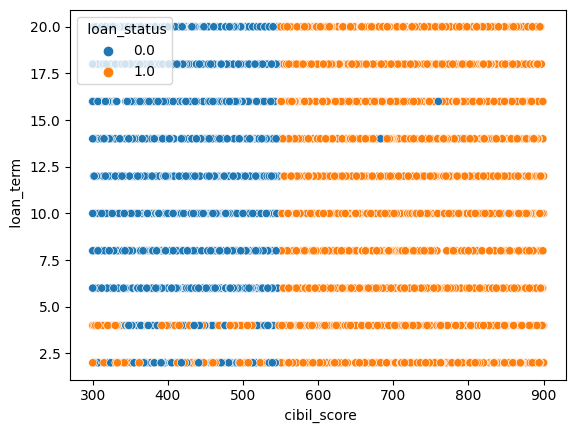

In [ ]:
sns.scatterplot(x=' cibil_score', y=' loan_term', hue=' loan_status', data=df)

# **TRAIN TEST SPLIT AND FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df.drop([' loan_status'],axis=1)
y=df[' loan_status']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X

,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1.0,0.0,12,778,2400000,17600000,22700000,8000000
1,0,0.0,1.0,8,417,2700000,2200000,8800000,3300000
2,3,1.0,0.0,20,506,7100000,4500000,33300000,12800000
3,3,1.0,0.0,8,467,18200000,3300000,23300000,7900000
4,5,0.0,1.0,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1.0,1.0,12,317,2800000,500000,3300000,800000
4265,0,0.0,1.0,20,559,4200000,2900000,11000000,1900000
4266,2,0.0,0.0,18,457,1200000,12400000,18100000,7300000
4267,1,0.0,0.0,8,780,8200000,700000,14100000,5800000


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4],
}

In [ ]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.9613583138173302

In [ ]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9690140845070423

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       323
         1.0       0.97      0.97      0.97       531

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



Text(50.722222222222214, 0.5, 'True')

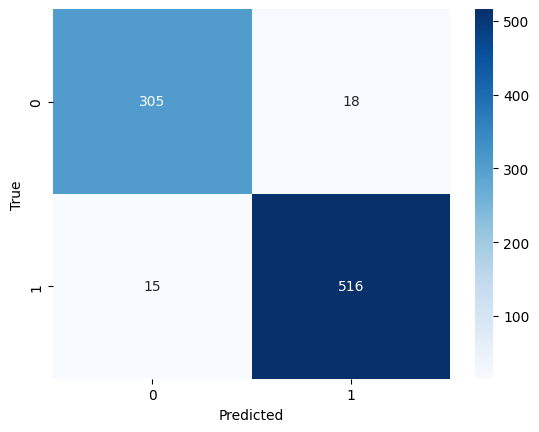

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

#Support Vector Machines

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc



94.44

#Decision Tree Classifier 

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))
print('Accuracy of D_t on train set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

Accuracy of D_t on test set: 0.96
Accuracy of D_t on train set: 0.97
Decision tree classifier (max_depth = 2)
 [[305  18]
 [ 20 511]]


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))
print('Accuracy of D_t on train set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

Accuracy of D_t on test set: 0.95
Accuracy of D_t on train set: 0.96
Decision tree classifier (max_depth = 2)
 [[305  18]
 [ 22 509]]


# **ANN**

In [68]:
!pip install  tensorflow
!pip install keras-tuner
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

import kerastuner as kt
from keras.callbacks import ModelCheckpoint, EarlyStopping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.8 MB/s eta 0:00:00


In [69]:
def build_model(hp):
    model = Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0 :
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=40,step=4),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=9))
            model.add(Dropout(hp.Choice('drp'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else :
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=40,step=4),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid'])))
            model.add(Dropout(hp.Choice('drp'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            counter+=1
    model.add(Dense(1,activation='sigmoid'))
    # model.load_weights('sabrin.h5')
    model.save("model.h5")

    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [70]:
# def build_model(hp):
#   model = keras.Sequential()
#   model.add(keras.layers.Dense(
#       hp.Choice('units', [8, 16, 32]),
#       activation='relu'))
#   model.add(keras.layers.Dense(1, activation='relu'))
#   model.compile(loss='mse')
#   return model

In [71]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=100)

In [72]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
tuner.get_best_hyperparameters()[0].values

Trial 100 Complete [00h 00m 12s]
val_accuracy: 0.6217798590660095

Best val_accuracy So Far: 0.9402810335159302
Total elapsed time: 00h 12m 33s


{'num_layers': 4,
 'units0': 32,
 'activation0': 'relu',
 'drp0': 0.3,
 'optimizer': 'adam',
 'units1': 20,
 'activation1': 'sigmoid',
 'drp1': 0.6,
 'units2': 32,
 'activation2': 'sigmoid',
 'drp2': 0.5,
 'units3': 24,
 'activation3': 'tanh',
 'drp3': 0.1,
 'units4': 12,
 'activation4': 'relu',
 'drp4': 0.1,
 'units5': 40,
 'activation5': 'relu',
 'drp5': 0.6,
 'units6': 32,
 'activation6': 'relu',
 'drp6': 0.9,
 'units7': 32,
 'activation7': 'relu',
 'drp7': 0.6,
 'units8': 8,
 'activation8': 'sigmoid',
 'drp8': 0.7,
 'units9': 20,
 'activation9': 'sigmoid',
 'drp9': 0.7}

In [73]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                672       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                7

In [74]:
path="model.h5"
callbackES=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)
callbackMC=ModelCheckpoint(path, monitor="val_accuracy", mode='max',verbose=1,restore_best_weights=True )

In [75]:
history = model.fit(X_train,y_train,epochs=200,initial_epoch=5,validation_data=(X_test,y_test),callbacks=[callbackES,callbackMC])
# history = model.fit(X_train,y_train,epochs=200,initial_epoch=5,validation_data=(X_test,y_test),callbacks=[callbackMC])

Epoch 6/200
 99/107 [==========================>...] - ETA: 0s - loss: 0.2928 - accuracy: 0.8860
Epoch 6: saving model to model.h5
107/107 [==============================] - 4s 8ms/step - loss: 0.2930 - accuracy: 0.8864 - val_loss: 0.1828 - val_accuracy: 0.9426
Epoch 7/200
103/107 [===========================>..] - ETA: 0s - loss: 0.2717 - accuracy: 0.8950
Epoch 7: saving model to model.h5
107/107 [==============================] - 1s 5ms/step - loss: 0.2725 - accuracy: 0.8949 - val_loss: 0.1780 - val_accuracy: 0.9450
Epoch 8/200
103/107 [===========================>..] - ETA: 0s - loss: 0.2624 - accuracy: 0.9056
Epoch 8: saving model to model.h5
107/107 [==============================] - 1s 5ms/step - loss: 0.2642 - accuracy: 0.9040 - val_loss: 0.1821 - val_accuracy: 0.9426
Epoch 9/200
 96/107 [=========================>....] - ETA: 0s - loss: 0.2543 - accuracy: 0.9072
Epoch 9: saving model to model.h5
107/107 [==============================] - 1s 5ms/step - loss: 0.2552 - accuracy: 0

In [76]:
y_rec = model.predict(X_test)


27/27 [==============================] - 0s 1ms/step


In [77]:
y_pred = np.where(y_rec>=0.5,1,0)

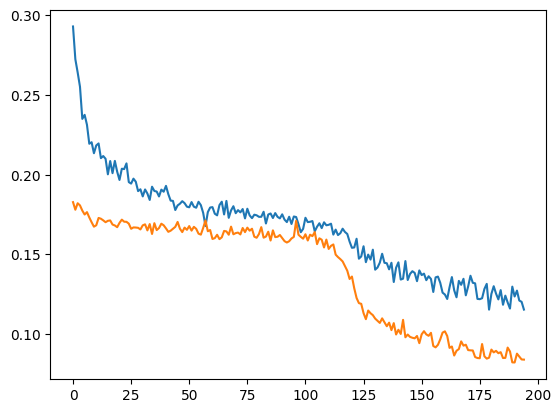

In [78]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

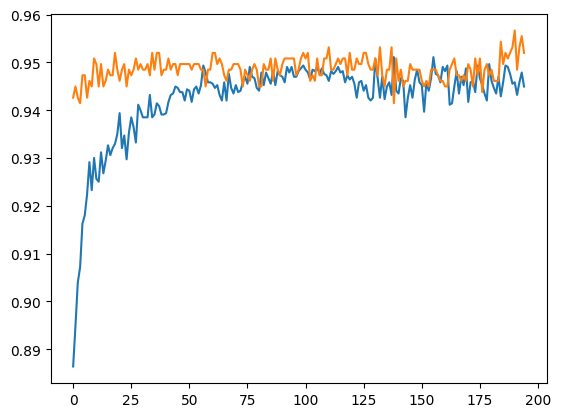

In [79]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')

In [80]:
from sklearn.metrics import accuracy_score
score_ann=accuracy_score(y_test,y_pred)
score_ann

0.9519906323185011

In [81]:
f1_ann=f1_score(y_pred,y_test)
f1_ann

0.9618604651162789

In [82]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       323
         1.0       0.95      0.97      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



Text(50.722222222222214, 0.5, 'True')

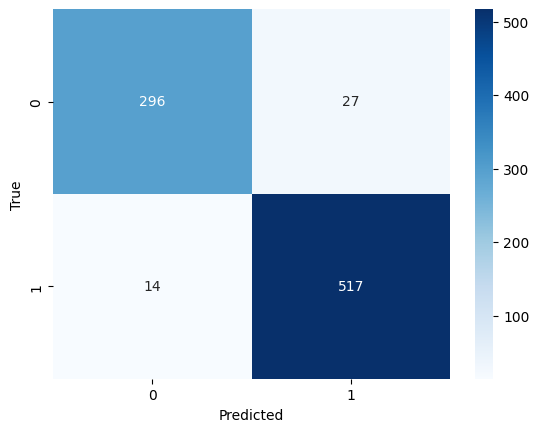

In [83]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [84]:
print('ACCURACY')
print('Accuracy of RF is',score_rf)
print('Accuracy of ANN is',score_ann)

ACCURACY
Accuracy of RF is 0.9613583138173302
Accuracy of ANN is 0.9519906323185011


In [85]:
print('F1 SCORE')
print('F1 SCORE of RF is',f1_rf)
print('F1 SCORE of ANN is',f1_ann)

F1 SCORE
F1 SCORE of RF is 0.9690140845070423
F1 SCORE of ANN is 0.9618604651162789


In [86]:
!pip install hiplot
import hiplot as hip
data = [{'epoch': idx,
    'loss': history.history['loss'][idx],
    'val_loss': history.history['val_loss'][idx],
    'accuracy': history.history['accuracy'][idx],
    'val_accuracy': history.history['val_accuracy'][idx]}
    for idx in range(120)]
hip.Experiment.from_iterable(data).display()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.2/863.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.4 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

# **CONCLUSIONS**
* RF & Decision tree  gives a accuracy of 96%  
* ANN gives a accuracy of 95%
* SVC given a accuracy of 94%
* Both models are equally good and either of them can be used , though if we had more data ANN might have given a better accuracy.